<a href="https://colab.research.google.com/github/MeenTers/KKU_data_mining/blob/master/cafe_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Function

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/SIST'
cafe = os.path.join(path,'cafedata.csv')

# Create DataFrame

In [11]:
cafe_df = pd.read_csv(cafe)
cafe_df.head()

,t,Date,Day Code,Day of Week,Bread Sand Sold,Bread Sand Waste,Wraps Sold,Wraps Waste,Muffins Sold,Muffins Waste,Cookies Sold,Cookies Waste,Fruit Cup Sold,Fruit Cup Waste,Chips,Juices,Sodas,Coffees,Total Soda and Coffee,Sales,Max Daily Temperature (F),Total Items Wasted,Unnamed: 22
0,1,1/19/2010,2,Tue,5,3,25,5,5,1,5,3,1,4,12,8,20,41,61,199.95,36,16,NaN
1,2,1/20/2010,3,Wed,6,8,7,17,3,5,1,6,0,3,0,0,13,33,46,195.74,34,39,NaN
2,3,1/21/2010,4,Thu,8,2,14,0,4,0,1,0,0,3,0,13,23,34,57,102.68,39,5,NaN
3,4,1/22/2010,5,Fri,4,2,5,7,5,0,3,1,3,0,20,0,13,27,40,162.88,40,10,NaN
4,5,1/25/2010,1,Mon,3,0,10,0,8,0,3,0,2,0,0,5,13,20,33,101.76,36,0,NaN


In [12]:
cafe_df = cafe_df.drop(columns=['Unnamed: 22'])
cafe_df = cafe_df.dropna()
cafe_df.head()

,t,Date,Day Code,Day of Week,Bread Sand Sold,Bread Sand Waste,Wraps Sold,Wraps Waste,Muffins Sold,Muffins Waste,Cookies Sold,Cookies Waste,Fruit Cup Sold,Fruit Cup Waste,Chips,Juices,Sodas,Coffees,Total Soda and Coffee,Sales,Max Daily Temperature (F),Total Items Wasted
0,1,1/19/2010,2,Tue,5,3,25,5,5,1,5,3,1,4,12,8,20,41,61,199.95,36,16
1,2,1/20/2010,3,Wed,6,8,7,17,3,5,1,6,0,3,0,0,13,33,46,195.74,34,39
2,3,1/21/2010,4,Thu,8,2,14,0,4,0,1,0,0,3,0,13,23,34,57,102.68,39,5
3,4,1/22/2010,5,Fri,4,2,5,7,5,0,3,1,3,0,20,0,13,27,40,162.88,40,10
4,5,1/25/2010,1,Mon,3,0,10,0,8,0,3,0,2,0,0,5,13,20,33,101.76,36,0


In [15]:
cafe_df = cafe_df[['t','Bread Sand Sold','Wraps Sold','Muffins Sold','Cookies Sold','Fruit Cup Sold',' Sales ']]
cafe_df = cafe_df.astype(float)
cafe_df.head()

,t,Bread Sand Sold,Wraps Sold,Muffins Sold,Cookies Sold,Fruit Cup Sold,Sales
0,1.0,5.0,25.0,5.0,5.0,1.0,199.95
1,2.0,6.0,7.0,3.0,1.0,0.0,195.74
2,3.0,8.0,14.0,4.0,1.0,0.0,102.68
3,4.0,4.0,5.0,5.0,3.0,3.0,162.88
4,5.0,3.0,10.0,8.0,3.0,2.0,101.76


In [16]:
cafe_df.describe()

,t,Bread Sand Sold,Wraps Sold,Muffins Sold,Cookies Sold,Fruit Cup Sold,Sales
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,24.297872,4.702128,13.148936,5.851064,5.787234,1.702128,148.221702
std,14.080382,2.235240,5.868037,4.791200,3.256673,1.159364,45.462163
min,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,61.940000
25%,12.500000,3.000000,9.000000,3.000000,3.000000,1.000000,119.875000
50%,24.000000,4.000000,13.000000,5.000000,5.000000,2.000000,150.510000
75%,36.500000,6.000000,16.500000,8.000000,8.000000,2.000000,179.020000
max,48.000000,9.000000,25.000000,28.000000,13.000000,4.000000,240.870000


# K-mean

In [6]:
from sklearn.cluster import KMeans

In [7]:
def my_kmean(X):
    KMclust = KMeans(n_clusters=3,random_state=10)
    KMclust.fit(X)
    label = KMclust.predict(X)
    return label

In [17]:
presales = my_kmean(cafe_df[[' Sales ']])
presales

array([1, 1, 0, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       1, 2, 2], dtype=int32)

In [18]:
prebread = my_kmean(cafe_df[['Bread Sand Sold']])
prebread

array([0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 2,
       1, 0, 0], dtype=int32)

In [19]:
prewraps = my_kmean(cafe_df[['Wraps Sold']])
prewraps

array([2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0,
       2, 0, 1, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0,
       2, 1, 1], dtype=int32)

In [20]:
premuffins = my_kmean(cafe_df[['Muffins Sold']])
premuffins

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0], dtype=int32)

In [21]:
precookies = my_kmean(cafe_df[['Cookies Sold']])
precookies

array([0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       2, 2, 0], dtype=int32)

In [22]:
prefruit = my_kmean(cafe_df[['Fruit Cup Sold']])
prefruit

array([0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0,
       1, 1, 0], dtype=int32)

In [24]:
table_kmean = pd.DataFrame(presales,columns=['Group of Sales'])
table_kmean['Group of Bread Sand Sold'] = prebread
table_kmean['Group of Wraps Sold'] = prewraps
table_kmean['Group of Muffins Sold'] = premuffins
table_kmean['Group of Cookies Sold'] = precookies 
table_kmean['Group of Fruit Cup Sold'] = prefruit
table_kmean.head()

,Group of Sales,Group of Bread Sand Sold,Group of Wraps Sold,Group of Muffins Sold,Group of Cookies Sold,Group of Fruit Cup Sold
0,1,0,2,0,0,0
1,1,1,0,0,1,0
2,0,1,1,0,1,0
3,2,0,0,0,1,1
4,0,0,0,1,1,2


In [25]:
table_total = cafe_df[['Bread Sand Sold','Wraps Sold','Muffins Sold','Cookies Sold','Fruit Cup Sold',' Sales ']]
table_total['Group of Sales'] = presales
table_total['Group of Bread Sand Sold'] = prebread
table_total['Group of Wraps Sold'] = prewraps
table_total['Group of Muffins Sold'] = premuffins
table_total['Group of Cookies Sold'] = precookies 
table_total['Group of Fruit Cup Sold'] = prefruit
table_total.head()

,Bread Sand Sold,Wraps Sold,Muffins Sold,Cookies Sold,Fruit Cup Sold,Sales,Group of Sales,Group of Bread Sand Sold,Group of Wraps Sold,Group of Muffins Sold,Group of Cookies Sold,Group of Fruit Cup Sold
0,5.0,25.0,5.0,5.0,1.0,199.95,1,0,2,0,0,0
1,6.0,7.0,3.0,1.0,0.0,195.74,1,1,0,0,1,0
2,8.0,14.0,4.0,1.0,0.0,102.68,0,1,1,0,1,0
3,4.0,5.0,5.0,3.0,3.0,162.88,2,0,0,0,1,1
4,3.0,10.0,8.0,3.0,2.0,101.76,0,0,0,1,1,2


# Definition of Group K-mean

In [52]:
table_total[table_total['Group of Fruit Cup Sold']==2].describe()

,Bread Sand Sold,Wraps Sold,Muffins Sold,Cookies Sold,Fruit Cup Sold,Sales,Group of Sales,Group of Bread Sand Sold,Group of Wraps Sold,Group of Muffins Sold,Group of Cookies Sold,Group of Fruit Cup Sold
count,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,5.058824,13.411765,5.647059,5.705882,2.0,148.432353,1.529412,0.705882,0.941176,0.352941,0.941176,2.0
std,2.192903,4.848438,3.408467,2.663755,0.0,34.492337,0.717430,0.685994,0.747545,0.492592,0.899346,0.0
min,2.000000,4.000000,0.000000,2.000000,2.0,75.870000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,3.000000,10.000000,3.000000,4.000000,2.0,128.590000,1.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,4.000000,14.000000,6.000000,5.000000,2.0,150.510000,2.000000,1.000000,1.000000,0.000000,1.000000,2.0
75%,7.000000,17.000000,8.000000,8.000000,2.0,168.080000,2.000000,1.000000,1.000000,1.000000,2.000000,2.0
max,8.000000,21.000000,12.000000,10.000000,2.0,217.290000,2.000000,2.000000,2.000000,1.000000,2.000000,2.0


# Split train and test

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(table_kmean[['Group of Bread Sand Sold','Group of Wraps Sold','Group of Muffins Sold','Group of Cookies Sold','Group of Fruit Cup Sold']],table_kmean['Group of Sales'],test_size=0.1, random_state=6)
X = table_kmean[['Group of Bread Sand Sold','Group of Wraps Sold','Group of Muffins Sold','Group of Cookies Sold','Group of Fruit Cup Sold']]

# RF

In [31]:
from sklearn.ensemble import RandomForestClassifier
skRF = RandomForestClassifier()
skRF.fit(X_train, y_train)
skRF.score(X_test,y_test)

0.8

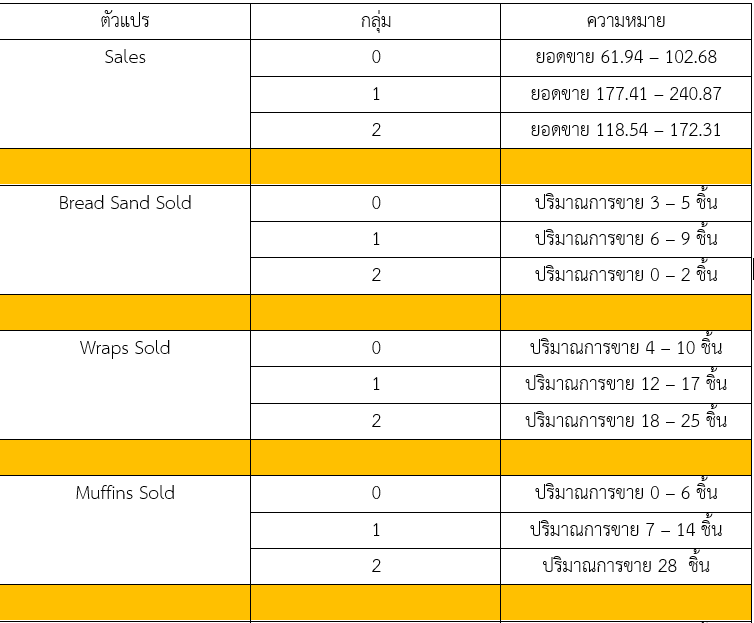

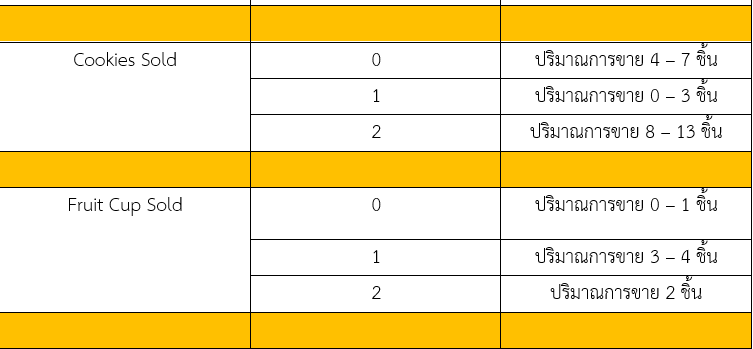

In [32]:
table_kmean['Predict Group of Sales'] = skRF.predict(X)
table_kmean.head(10)

,Group of Sales,Group of Bread Sand Sold,Group of Wraps Sold,Group of Muffins Sold,Group of Cookies Sold,Group of Fruit Cup Sold,Predict Group of Sales
0,1,0,2,0,0,0,1
1,1,1,0,0,1,0,1
2,0,1,1,0,1,0,0
3,2,0,0,0,1,1,2
4,0,0,0,1,1,2,0
5,1,1,0,0,0,2,1
6,2,1,2,0,2,2,2
7,1,2,0,0,1,0,0
8,0,0,0,0,1,0,0
9,2,2,1,0,0,2,2
